## Adnan Malkani

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Loading and Exploring the Data



In [28]:
df = pd.read_csv('house_prices_data .csv')

In [29]:
df.head()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.9407
1,1360,5,57,335254.9957
2,1794,5,51,402370.0907
3,1630,2,11,311854.2980
4,1595,5,38,379356.5904


In [30]:
df.shape

(100, 4)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   House_Age       100 non-null    int64  
 3   House_Price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [32]:
df.describe()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
count,100.000000,100.000000,100.000000,100.000000
mean,2368.700000,2.970000,47.780000,449659.080683
std,1018.723617,1.480206,31.132684,154305.631369
min,521.000000,1.000000,0.000000,133560.988200
25%,1566.750000,1.000000,19.000000,313684.825475
50%,2468.000000,3.000000,50.000000,450938.501850
75%,3288.750000,4.000000,72.500000,568634.253775
max,3999.000000,5.000000,98.000000,756310.952100


In [33]:
df.isnull().sum()

Square_Footage    0
Num_Bedrooms      0
House_Age         0
House_Price       0
dtype: int64

The dataset had no missing values, and the statistics gave us insights into the distribution of each variable (e.g., house prices ranged from $133,561 to $756,311)

### Visualizing the Data

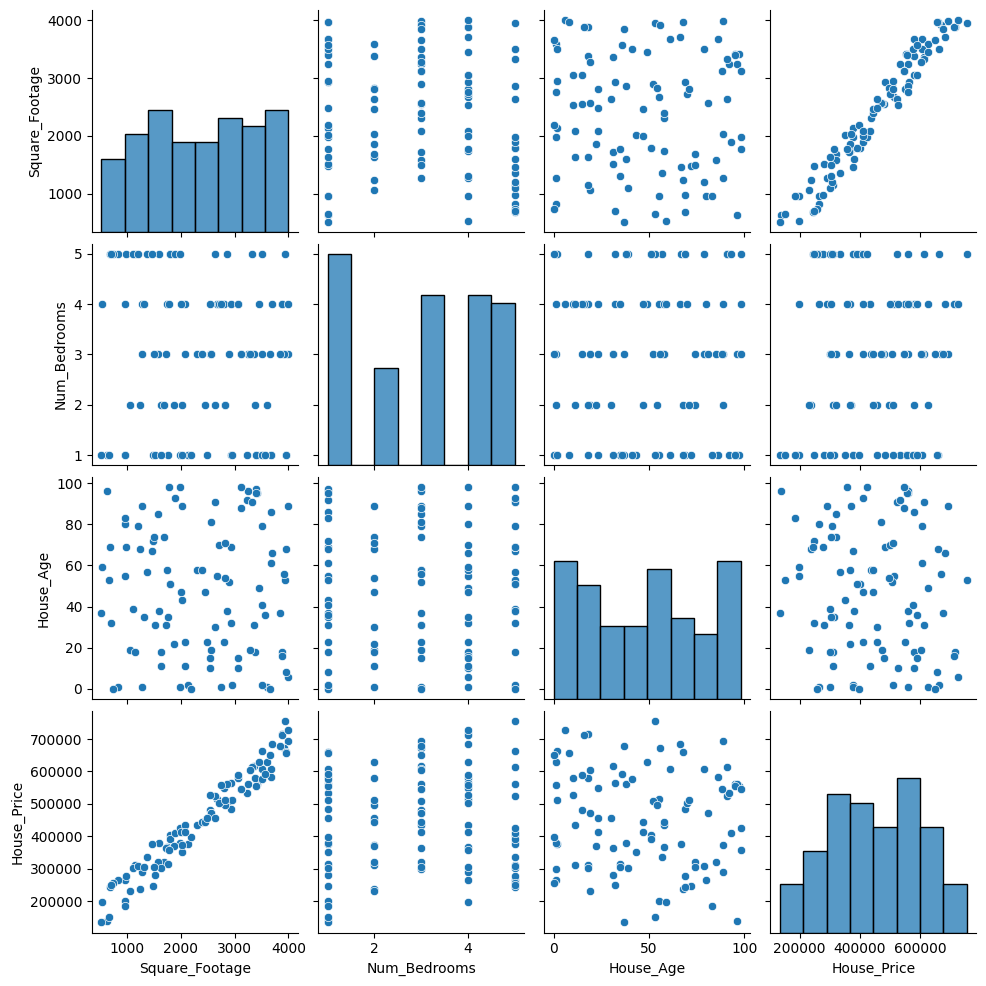

In [34]:
# Pairplot to show pairwise relationships between all variables
sns.pairplot(df)
plt.show()

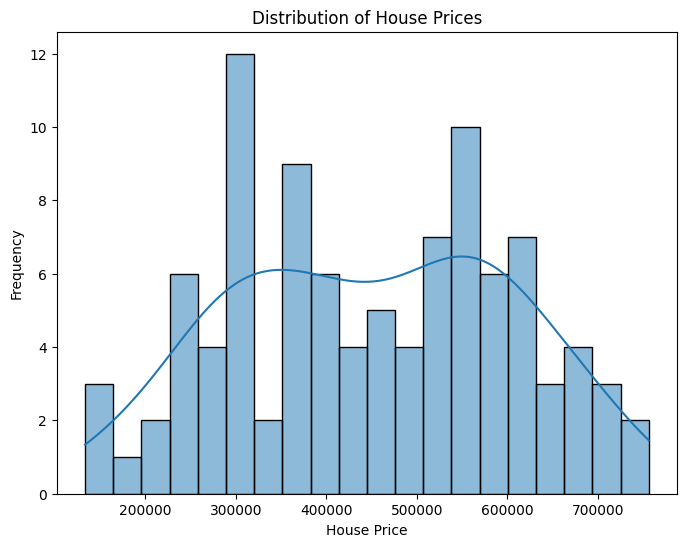

In [35]:
# Distribution plot for House Price
plt.figure(figsize=(8, 6))
sns.histplot(df['House_Price'], kde=True, bins=20)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

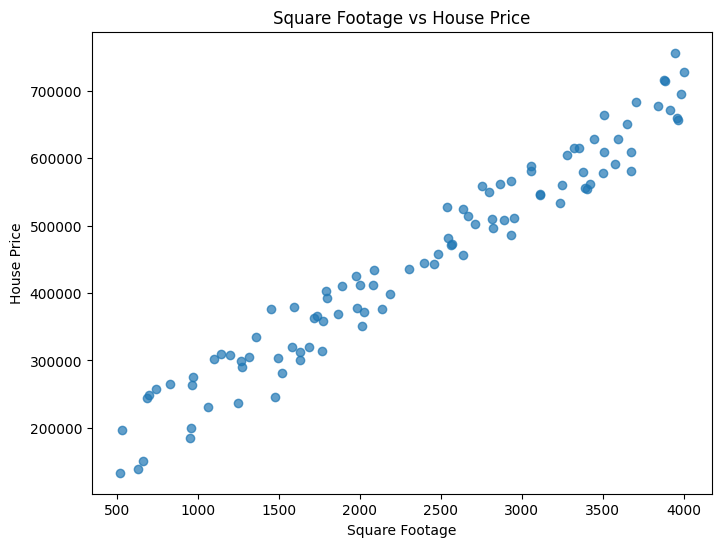

In [36]:
# Scatter plot: Square Footage vs House Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Square_Footage'], df['House_Price'], alpha=0.7)
plt.title('Square Footage vs House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()

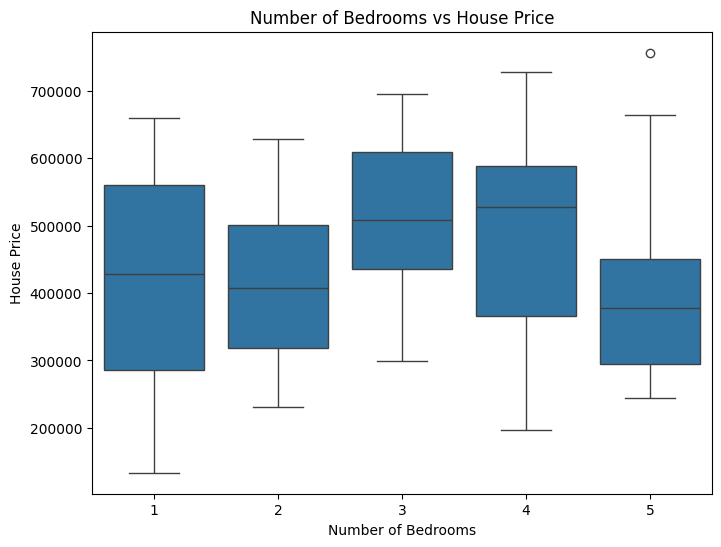

In [37]:
# Box plot: Number of Bedrooms vs House Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=df)
plt.title('Number of Bedrooms vs House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.show()


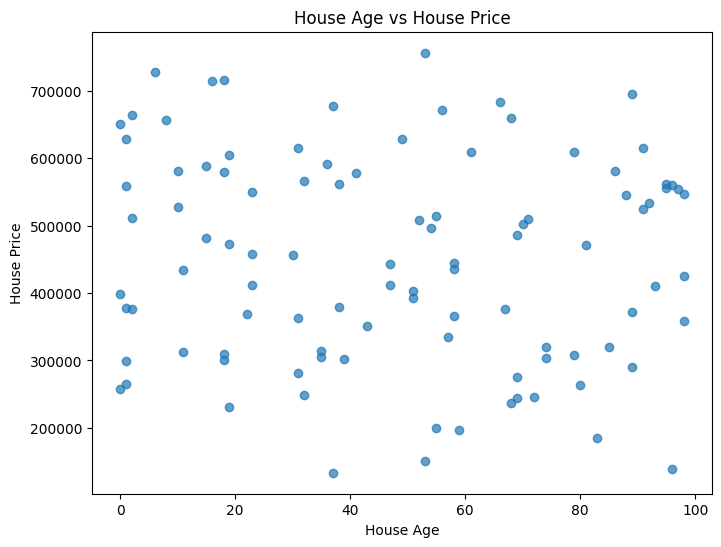

In [38]:
# Scatter plot: House Age vs House Price
plt.figure(figsize=(8, 6))
plt.scatter(df['House_Age'], df['House_Price'], alpha=0.7)
plt.title('House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

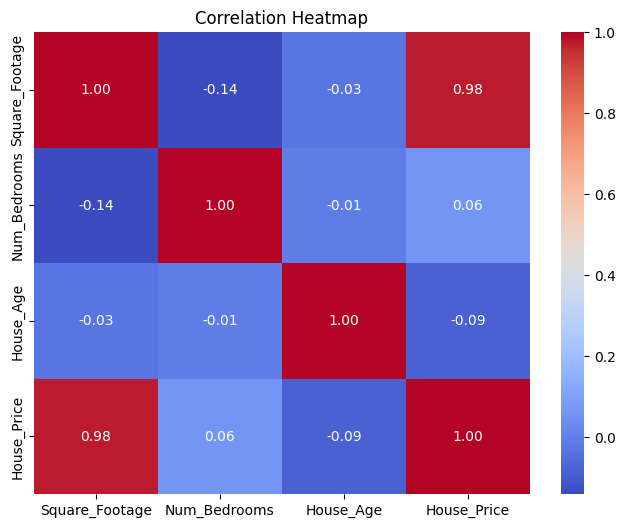

In [39]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Visualizations performed:

Pairplot: Shows relationships between all variables. This helped identify that larger houses generally cost more, and more bedrooms also contribute to higher prices.

Distribution Plot: The distribution of house prices showed a right-skewed distribution (more lower-priced houses than higher-priced ones).

Scatter Plot (Square Footage vs House Price): Displayed a positive correlation, showing that as square footage increases, house prices tend to increase.

Box Plot (Number of Bedrooms vs House Price): Showed how house prices vary with the number of bedrooms. More bedrooms generally corresponded to higher prices, but there was some overlap.

Scatter Plot (House Age vs House Price): Showed that newer houses tend to have higher prices, while older houses tend to be cheaper.

Correlation Heatmap: Highlighted the relationships between features and the target variable. Square footage had the highest positive correlation with house price.

### Splitting the Data

In [40]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% training, 20% testing)
X = df[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y = df['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and R² score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Mean Squared Error - ',mse_linear)
print('R² Score - ',r2_linear)


Mean Squared Error -  91726130.74595417
R² Score -  0.9965233213496424


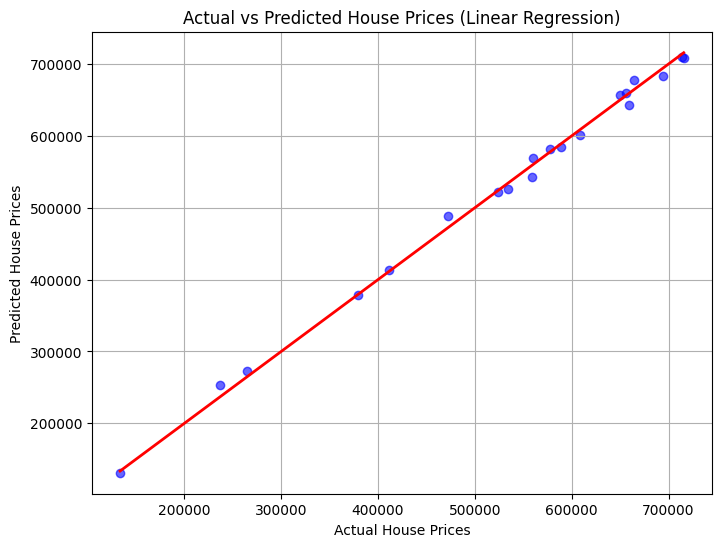

In [42]:
# Scatter plot comparing actual and predicted values for the test set (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(True)
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate MSE and R² score for Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


print('Mean Squared Error - ',mse_tree)
print('R² Score - ',r2_tree)


Mean Squared Error -  1423306484.9515367
R² Score -  0.9460526762776937


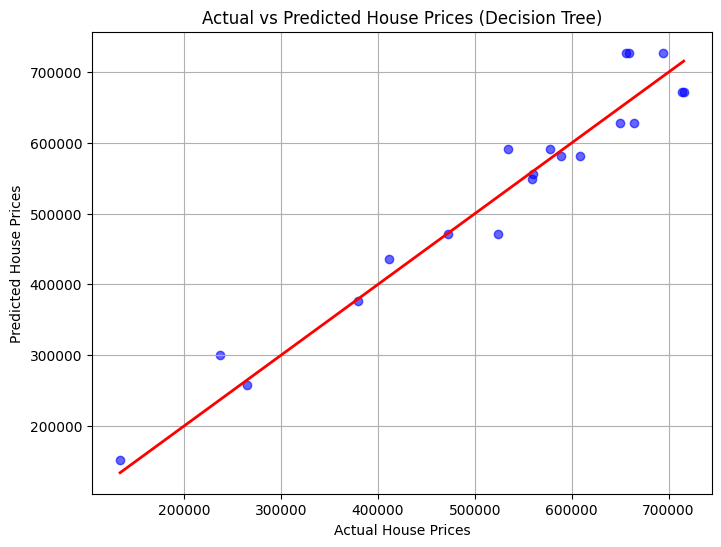

In [44]:
# Scatter plot comparing actual and predicted values for the test set (Decision Tree)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted House Prices (Decision Tree)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(True)
plt.show()

In [45]:
# Define a function to predict house prices based on input features using the linear model
def predict_house_price(square_footage, num_bedrooms, house_age, model=linear_model):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    predicted_price = model.predict(input_features)
    return predicted_price[0]





In [46]:
predict_house_price(2000, 3, 15)  # Predicts the price for a 2000 sq ft house with 3 bedrooms and 15 years old.


403506.56349522463

In [47]:
# Feature importance for Linear Regression (coefficients)
linear_feature_importance = pd.Series(linear_model.coef_, index=X.columns)

# Feature importance for Decision Tree (feature_importances_)
tree_feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)

linear_feature_importance, tree_feature_importance

(Square_Footage      151.233041
 Num_Bedrooms      21294.459586
 House_Age          -274.572639
 dtype: float64,
 Square_Footage    0.968381
 Num_Bedrooms      0.018549
 House_Age         0.013070
 dtype: float64)

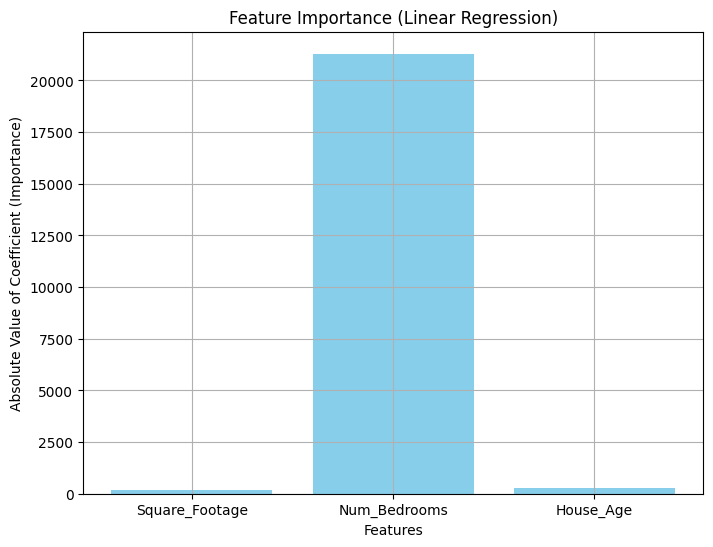

In [48]:
# Calculate the absolute values of the coefficients
importance = np.abs(linear_model.coef_)
features = ['Square_Footage', 'Num_Bedrooms', 'House_Age']

# Plot the feature importance for Linear Regression
plt.figure(figsize=(8, 6))
plt.bar(features, importance, color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Features')
plt.ylabel('Absolute Value of Coefficient (Importance)')
plt.grid(True)
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load and prepare your dataset here
# Assuming 'X' are the features and 'y' is the target (House Price)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets (80% training, 20% testing)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model on the scaled data
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)

# Calculate the MSE and R² score for the model trained on the normalized data
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print("MSE on scaled data:", mse_scaled)
print("R² score on scaled data:", r2_scaled)


MSE on scaled data: 91726130.74595422
R² score on scaled data: 0.9965233213496424


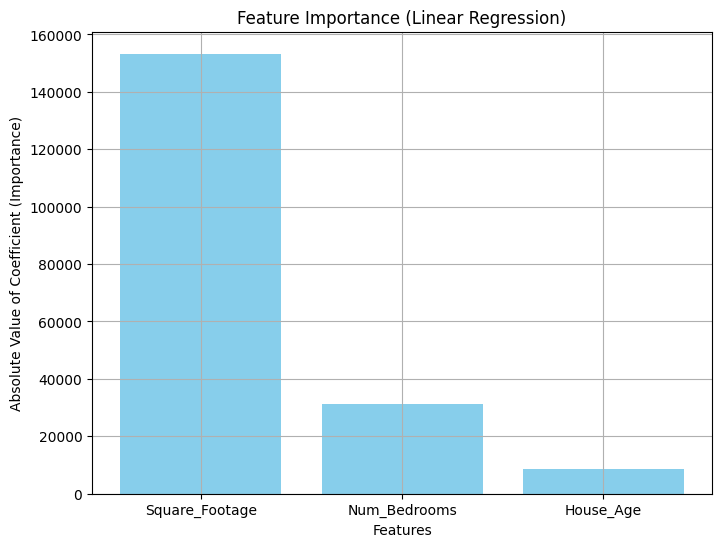

In [50]:
# Calculate the absolute values of the coefficients
importance = np.abs(linear_model_scaled.coef_)
features = ['Square_Footage', 'Num_Bedrooms', 'House_Age']

# Plot the feature importance for Linear Regression
plt.figure(figsize=(8, 6))
plt.bar(features, importance, color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Features')
plt.ylabel('Absolute Value of Coefficient (Importance)')
plt.grid(True)
plt.show()

### Conclusion
Unscaled Model: The importance of features is influenced by their original units. For example, Number of Bedrooms looked more important because its coefficient was much larger.

Scaled Model: After scaling, the features are on the same level, so the importance reflects the true relationship with house price. Square Footage likely becomes more important here because it has a stronger connection to price when you remove the unit effect.